In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
finsen_df = pd.read_csv('/content/FinSen_US_Categorized_Timestamp (3).csv')
finsen_df.head(100)

,Title,Tag,Time,Content
0,"TSX Slightly Down, Books Weekly Gains",Stock Market,16/07/2023,"TSX Slightly Down, Books Weekly GainsUnited St..."
1,UnitedHealth Hits 4-week High,stocks,15/07/2023,UnitedHealth Hits 4-week HighUnited States sto...
2,Cisco Systems Hits 4-week Low,stocks,15/07/2023,Cisco Systems Hits 4-week LowUnited States sto...
3,AT&T Hits All-time Low,stocks,15/07/2023,AT&T Hits All-time LowUnited States stocksAT&T...
4,Microsoft Hits 4-week High,stocks,15/07/2023,Microsoft Hits 4-week HighUnited States stocks...
...,...,...,...,...
95,Apple Hits All-time High,stocks,30/06/2023,Apple Hits All-time HighUnited States stocksAp...
96,Visa Hits 5-week High,stocks,30/06/2023,Visa Hits 5-week HighUnited States stocksVisa ...
97,Walt Disney Hits 4-week Low,stocks,30/06/2023,Walt Disney Hits 4-week LowUnited States stock...
98,Paychex earnings meet market expectations at 0...,Earnings,30/06/2023,Paychex earnings meet market expectations at 0...


In [3]:
finsen_df['Tag'].value_counts()

,count
Tag,
Stock Market,3632
Earnings,2731
Currency,1578
Government Bond 10Y,780
Crude Oil Stocks Change,372
...,...
Coronavirus Deaths,1
Calendar,1
6 Month Bill Yield,1


# Use FinBert for FinSen dataset

In [4]:
finsen_df['Time'] = pd.to_datetime(finsen_df['Time'])


# Filter for 2020 data
finsen_df_2020 = finsen_df[finsen_df['Time'].dt.year == 2020].copy()
finsen_df_2020.sort_values(by='Time', ascending=True, inplace=True)
finsen_df_2020.reset_index(drop=True, inplace=True)

<ipython-input-4-c94e9b4a92fe>:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  finsen_df['Time'] = pd.to_datetime(finsen_df['Time'])


In [5]:
pip install transformers torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [6]:

finsen_df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1887 entries, 0 to 1886
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Title    1887 non-null   object        
 1   Tag      1887 non-null   object        
 2   Time     1887 non-null   datetime64[ns]
 3   Content  1887 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 59.1+ KB


In [7]:
finsen_df_2020.head()

,Title,Tag,Time,Content
0,Stocks in United States Hit All-time High,Stock Market,2020-01-02,Stocks in United States Hit All-time HighUnite...
1,Stocks in United States Hit All-time High,Stock Market,2020-01-02,Stocks in United States Hit All-time HighUnite...
2,Dollar Falls as ISM Manufacturing PMI Disappoints,Currency,2020-01-03,Dollar Falls as ISM Manufacturing PMI Disappoi...
3,US Crude Oil Inventories Fall the Most Since June,Crude Oil Stocks Change,2020-01-03,US Crude Oil Inventories Fall the Most Since J...
4,ISM New York Index Drops to 3-1/2-Year Low,Ism New York Index,2020-01-03,ISM New York Index Drops to 3-1/2-Year LowUnit...


In [8]:
daily_aggregate = pd.read_csv("/content/SAggd.csv")

In [9]:
# 1. Process Tweet Data with Label Mapping
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch
import pandas as pd
from torch.nn.functional import softmax
tweet_df = pd.read_csv('/content/merged_stockemo.csv')

# Map labels to numerical scores
sentiment_map = {'bearish': -1, 'bullish': 1}  # Key change here
tweet_df['sentiment_score'] = tweet_df['senti_label'].map(sentiment_map)

# Convert dates
tweet_df['date'] = pd.to_datetime(tweet_df['date']).dt.date

# Aggregate daily scores (weighted average)
tweet_daily = tweet_df.groupby('date', as_index=False).agg(
    tweet_sentiment=('sentiment_score', 'mean'),  # Ranges from -1 to +1
    tweet_count=('sentiment_score', 'count'),
    bullish_count=('senti_label', lambda x: sum(x == 'bullish')),
    bearish_count=('senti_label', lambda x: sum(x == 'bearish'))
)
# 2. Process Financial News Data (assuming existing daily_aggregate)
news_daily = daily_aggregate.rename(columns={'Time': 'date'})
news_daily['date'] = pd.to_datetime(news_daily['date']).dt.date

# 3. Merge Datasets
combined_df = pd.merge(
    news_daily,
    tweet_daily,
    on='date',
    how='inner'  # Keep all dates from both datasets
).sort_values('date')

# 4. Handle Missing Values


# 5. Final DataFrame
print(combined_df)

     Unnamed: 0        date     SAggd  Article_Count  tweet_sentiment  \
0             0  2020-01-02  0.857209              2         1.000000   
1             1  2020-01-03 -0.943012              3         0.733333   
2             2  2020-01-06  0.297365              2         1.000000   
3             3  2020-01-07 -0.003144              3         0.714286   
4             4  2020-01-08  0.149545              7         0.517241   
..          ...         ...       ...            ...              ...   
265         270  2020-12-24  0.000003              1         0.729730   
266         271  2020-12-28  0.031617              5         0.600000   
267         272  2020-12-29  0.500348              5         0.789474   
268         273  2020-12-30 -0.273626              8         0.600000   
269         274  2020-12-31  0.828723              2         0.512195   

     tweet_count  bullish_count  bearish_count  
0             11             11              0  
1             15         

In [10]:
tweet_df

,id,date,ticker,emo_label,senti_label,original,processed,sentiment_score
0,100001,2020-01-01,AMZN,excitement,bullish,$AMZN Dow futures up by 100 points already 🥳,Amazon Dow futures up by 100 points already [...,1
1,100002,2020-01-01,TSLA,excitement,bullish,$TSLA Daddy's drinkin' eArly tonight! Here's t...,Tesla Daddy's drinkin' eArly tonight! Here's t...,1
2,100003,2020-01-01,AAPL,confusion,bullish,$AAPL We’ll been riding since last December fr...,Apple We’ll been riding since last December fr...,1
3,100004,2020-01-01,TSLA,excitement,bullish,"$TSLA happy new year, 2020, everyone🍷🎉🙏","Tesla happy new year, 2020, everyone [wine gla...",1
4,100005,2020-01-01,TSLA,excitement,bullish,"$TSLA haha just a collection of greats...""Mars...","Tesla haha just a collection of greats...""Mars...",1
...,...,...,...,...,...,...,...,...
9995,109996,2020-12-31,ABNB,optimism,bearish,"$ABNB “sugar daddy puts.” Don’t mind me, I’m j...","Airbnb “sugar daddy puts.” Don’t mind me, I’m ...",-1
9996,109997,2020-12-31,TSLA,disgust,bullish,$TSLA \nGood news... now bears can get help wh...,Tesla \nGood news... now bears can get help wh...,1
9997,109998,2020-12-31,BABA,confusion,bullish,$BABA Who else is glad they sold in 240s yeste...,Alibaba Who else is glad they sold in 240s yes...,1
9998,109999,2020-12-31,CCL,amusement,bullish,$CCL $23 calls for .79 you know what to do 🥳,Carnival $23 calls for .79 you know what to do...,1


In [11]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       270 non-null    int64  
 1   date             270 non-null    object 
 2   SAggd            270 non-null    float64
 3   Article_Count    270 non-null    int64  
 4   tweet_sentiment  270 non-null    float64
 5   tweet_count      270 non-null    int64  
 6   bullish_count    270 non-null    int64  
 7   bearish_count    270 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 17.0+ KB


In [12]:
import pandas as pd
import statsmodels.api as sm

nasdaq100_df = pd.read_csv('/content/NASDAQ100.csv')
nasdaq100_df.rename(columns={'Close/Last':'Close'}, inplace=True)
nasdaq100_df['Date'] = pd.to_datetime(nasdaq100_df['Date']).dt.date
merged_nasdaq100 = pd.merge(
    combined_df,
    nasdaq100_df,
    left_on='date',
    right_on='Date',
    how='inner'
).drop(columns=['Date'])

merged_nasdaq100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       252 non-null    int64  
 1   date             252 non-null    object 
 2   SAggd            252 non-null    float64
 3   Article_Count    252 non-null    int64  
 4   tweet_sentiment  252 non-null    float64
 5   tweet_count      252 non-null    int64  
 6   bullish_count    252 non-null    int64  
 7   bearish_count    252 non-null    int64  
 8   Close            252 non-null    float64
 9   Open             252 non-null    float64
 10  High             252 non-null    float64
 11  Low              252 non-null    float64
dtypes: float64(6), int64(5), object(1)
memory usage: 23.8+ KB


In [13]:
sp500_df = pd.read_csv('/content/S&P500.csv')
sp500_df.rename(columns={'Close/Last':'Close'}, inplace=True)
sp500_df['Date'] = pd.to_datetime(sp500_df['Date']).dt.date
merged_sp500 = pd.merge(
    combined_df,
    sp500_df,
    left_on='date',
    right_on='Date',
    how='inner'
).drop(columns=['Date'])

merged_sp500.head()

,Unnamed: 0,date,SAggd,Article_Count,tweet_sentiment,tweet_count,bullish_count,bearish_count,Close,Open,High,Low
0,0,2020-01-02,0.857209,2,1.000000,11,11,0,3257.85,3244.67,3258.14,3235.53
1,1,2020-01-03,-0.943012,3,0.733333,15,13,2,3234.85,3226.36,3246.15,3222.34
2,2,2020-01-06,0.297365,2,1.000000,8,8,0,3246.28,3217.55,3246.84,3214.64
3,3,2020-01-07,-0.003144,3,0.714286,28,24,4,3237.18,3241.86,3244.91,3232.43
4,4,2020-01-08,0.149545,7,0.517241,29,22,7,3253.05,3238.59,3267.07,3236.67


# Investigate data before modeling

## S&P500

In [14]:
# Pearson correlation (for linear relationships)
corr_matrix = merged_sp500[['SAggd', 'tweet_sentiment', 'Close']].corr(method='pearson')
print("Pearson Correlation Matrix:\n", corr_matrix)

# Spearman correlation (for monotonic relationships)
spearman_corr =  merged_sp500[['SAggd', 'tweet_sentiment', 'Close']].corr(method='spearman')
print("\nSpearman Correlation Matrix:\n", spearman_corr)

Pearson Correlation Matrix:
                     SAggd  tweet_sentiment     Close
SAggd            1.000000         0.238749  0.276370
tweet_sentiment  0.238749         1.000000  0.237217
Close            0.276370         0.237217  1.000000

Spearman Correlation Matrix:
                     SAggd  tweet_sentiment     Close
SAggd            1.000000         0.223241  0.229533
tweet_sentiment  0.223241         1.000000  0.220135
Close            0.229533         0.220135  1.000000


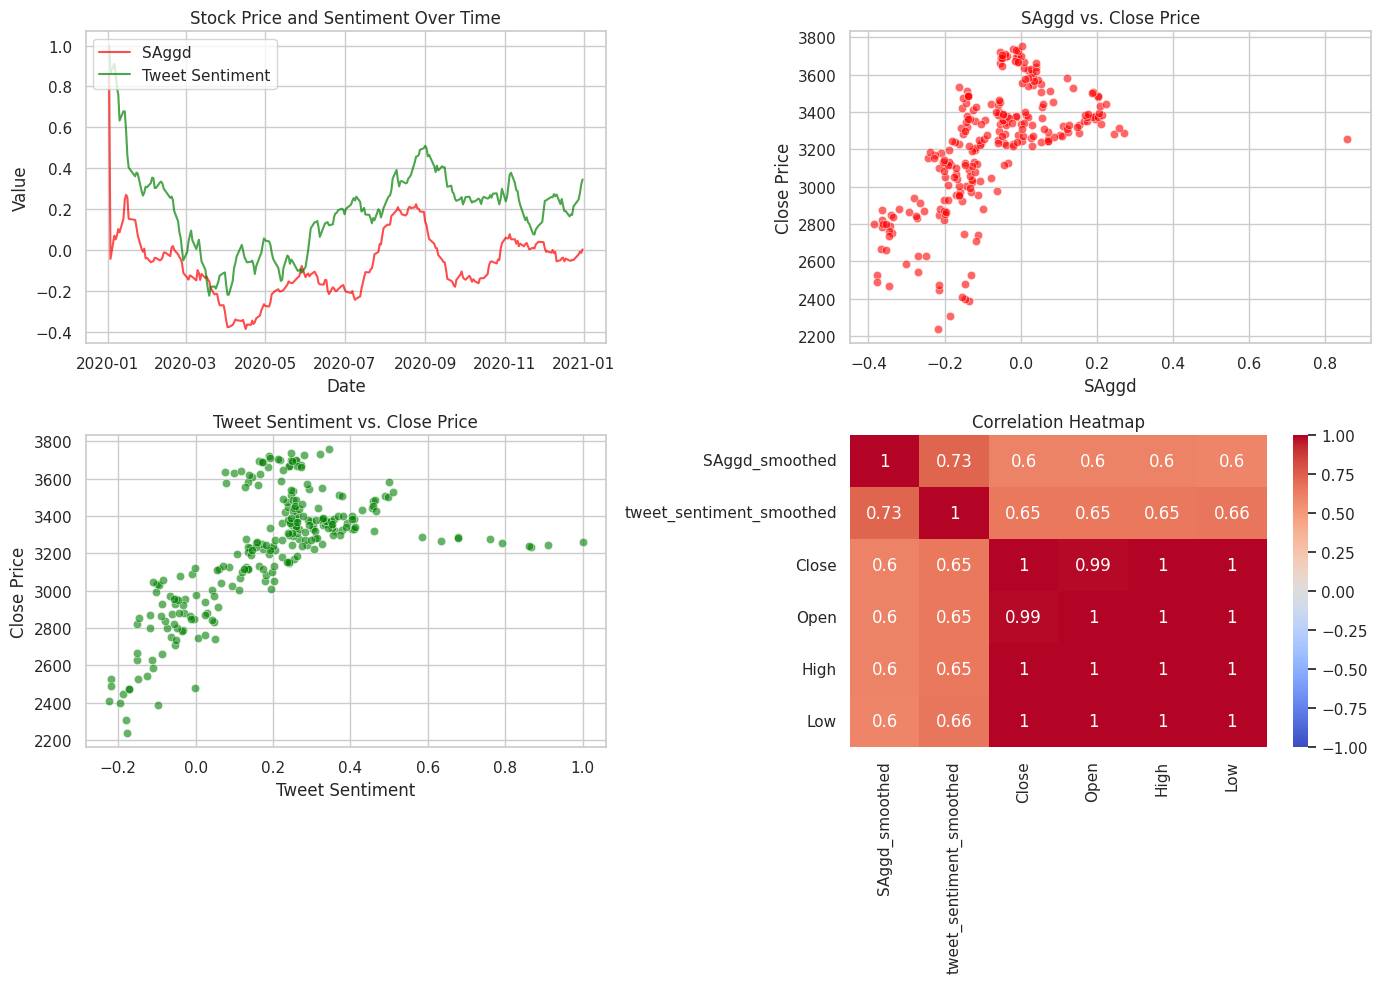

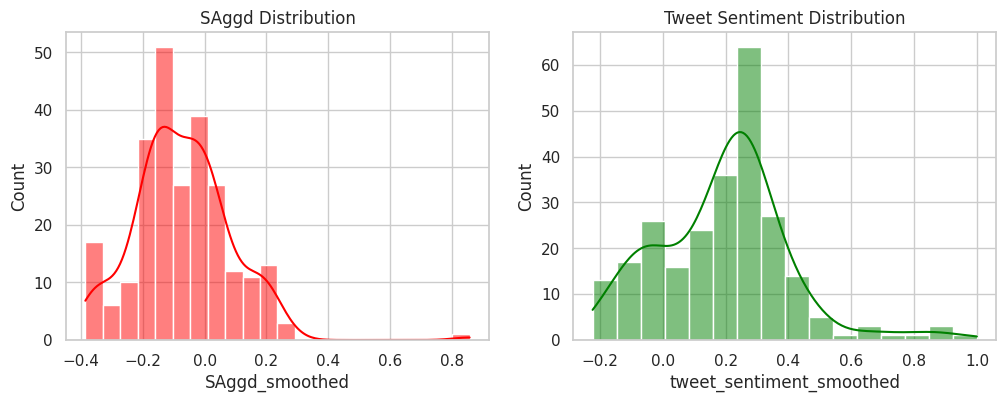

In [15]:
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 10))


window_size_news = 30
window_size_tweets = 30  # Days in the rolling window


# Apply to SAggd_sma (news sentiment)
merged_sp500['SAggd_smoothed'] = (
    merged_sp500['SAggd']
    .rolling(window=window_size_news, min_periods=1)
    .mean()
)

# Apply to tweet sentiment
merged_sp500['tweet_sentiment_smoothed'] = (
    merged_sp500['tweet_sentiment']
    .rolling(window=window_size_tweets, min_periods=1)
    .mean()
)

# --------------------------------------------
# 1. Time Series: Price and Sentiment Over Time
# --------------------------------------------
plt.subplot(2, 2, 1)

sns.lineplot(data=merged_sp500, x='date', y='SAggd_smoothed', label='SAggd', color='red', alpha=0.7)
sns.lineplot(data=merged_sp500, x='date', y='tweet_sentiment_smoothed', label='Tweet Sentiment', color='green', alpha=0.7)
plt.title('Stock Price and Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(loc='upper left')

# --------------------------------------------
# 2. Scatter Plots: Sentiment vs. Close Price
# --------------------------------------------
plt.subplot(2, 2, 2)
sns.scatterplot(data=merged_sp500, x='SAggd_smoothed', y='Close', color='red', alpha=0.6)
plt.title('SAggd vs. Close Price')
plt.xlabel('SAggd')
plt.ylabel('Close Price')

plt.subplot(2, 2, 3)
sns.scatterplot(data=merged_sp500, x='tweet_sentiment_smoothed', y='Close', color='green', alpha=0.6)
plt.title('Tweet Sentiment vs. Close Price')
plt.xlabel('Tweet Sentiment')
plt.ylabel('Close Price')

# --------------------------------------------
# 3. Correlation Heatmap (Original Variables)
# --------------------------------------------
plt.subplot(2, 2, 4)
corr_matrix = merged_sp500[['SAggd_smoothed', 'tweet_sentiment_smoothed', 'Close', 'Open', 'High', 'Low']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')

# Adjust layout and show
plt.tight_layout()
plt.show()

# --------------------------------------------
# 4. Distribution Plots (Optional)
# --------------------------------------------
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(merged_sp500['SAggd_smoothed'], kde=True, color='red', ax=ax[0])
sns.histplot(merged_sp500['tweet_sentiment_smoothed'], kde=True, color='green', ax=ax[1])
ax[0].set_title('SAggd Distribution')
ax[1].set_title('Tweet Sentiment Distribution')
plt.show()

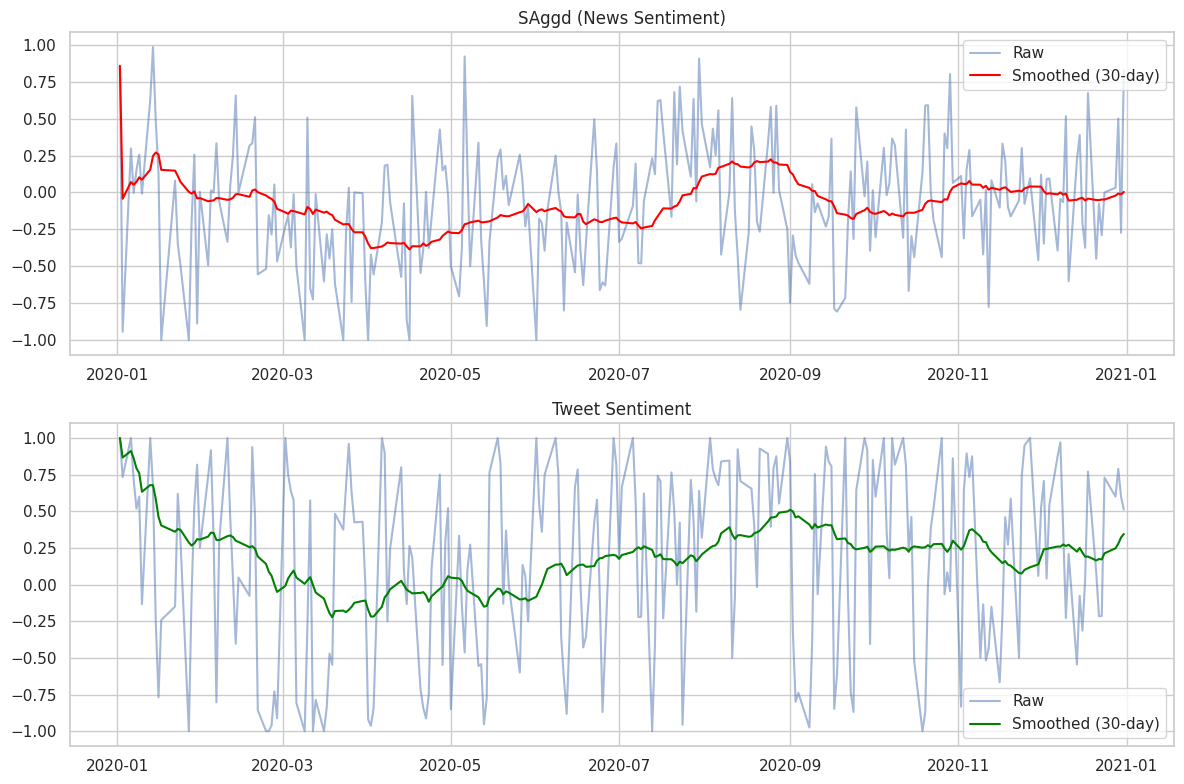

In [16]:


# Plot SAggd_sma (sentiment)
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
ax[0].plot(merged_sp500['date'], merged_sp500['SAggd'], label='Raw', alpha=0.5)
ax[0].plot(merged_sp500['date'], merged_sp500['SAggd_smoothed'], label='Smoothed (30-day)', color='red')
ax[0].set_title("SAggd (News Sentiment)")
ax[0].legend()

# Plot Article_Count_sma
ax[1].plot(merged_sp500['date'], merged_sp500['tweet_sentiment'], label='Raw', alpha=0.5)
ax[1].plot(merged_sp500['date'], merged_sp500['tweet_sentiment_smoothed'], label='Smoothed (30-day)', color='green')
ax[1].set_title("Tweet Sentiment")
ax[1].legend()

plt.tight_layout()
plt.show()

In [17]:

# Parameters
window_size = 60 # Days in the rolling window



# Columns to smooth (non-sentiment)
count_cols = ['Article_Count', 'tweet_count', 'bullish_count', 'bearish_count']

# Apply rolling mean to non-sentiment columns
for col in count_cols:

    merged_sp500[f"{col}_sma"] = (
        merged_sp500[col]
        .rolling(window=window_size, min_periods=1)
        .mean()  # Simple moving average (equal weights)
    )

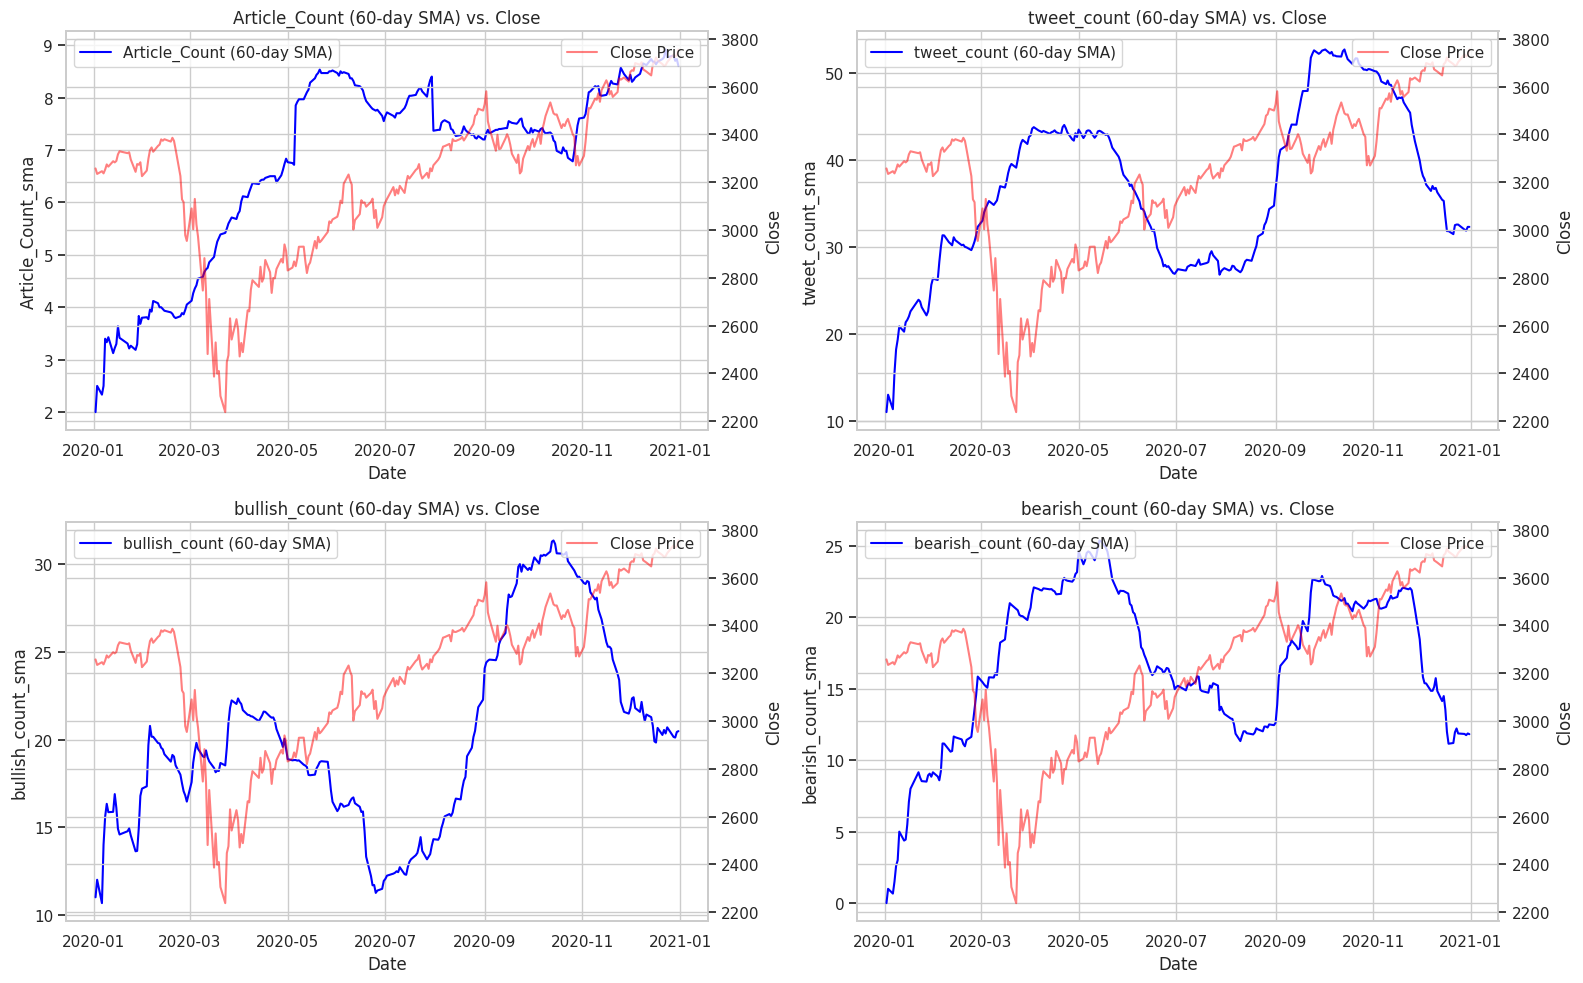

In [18]:

# Plot settings
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

# Plot each smoothed count and Close over time
for i, col in enumerate(count_cols):
    ax = axes[i]
    sns.lineplot(
        data=merged_sp500,
        x='date',
        y=f"{col}_sma",
        ax=ax,
        label=f"{col} (60-day SMA)",
        color='blue'
    )
    ax2 = ax.twinx()  # Secondary y-axis for Close
    sns.lineplot(
        data=merged_sp500,
        x='date',
        y='Close',
        ax=ax2,
        label='Close Price',
        color='red',
        alpha=0.5
    )
    ax.set_title(f"{col} (60-day SMA) vs. Close")
    ax.set_xlabel("Date")
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

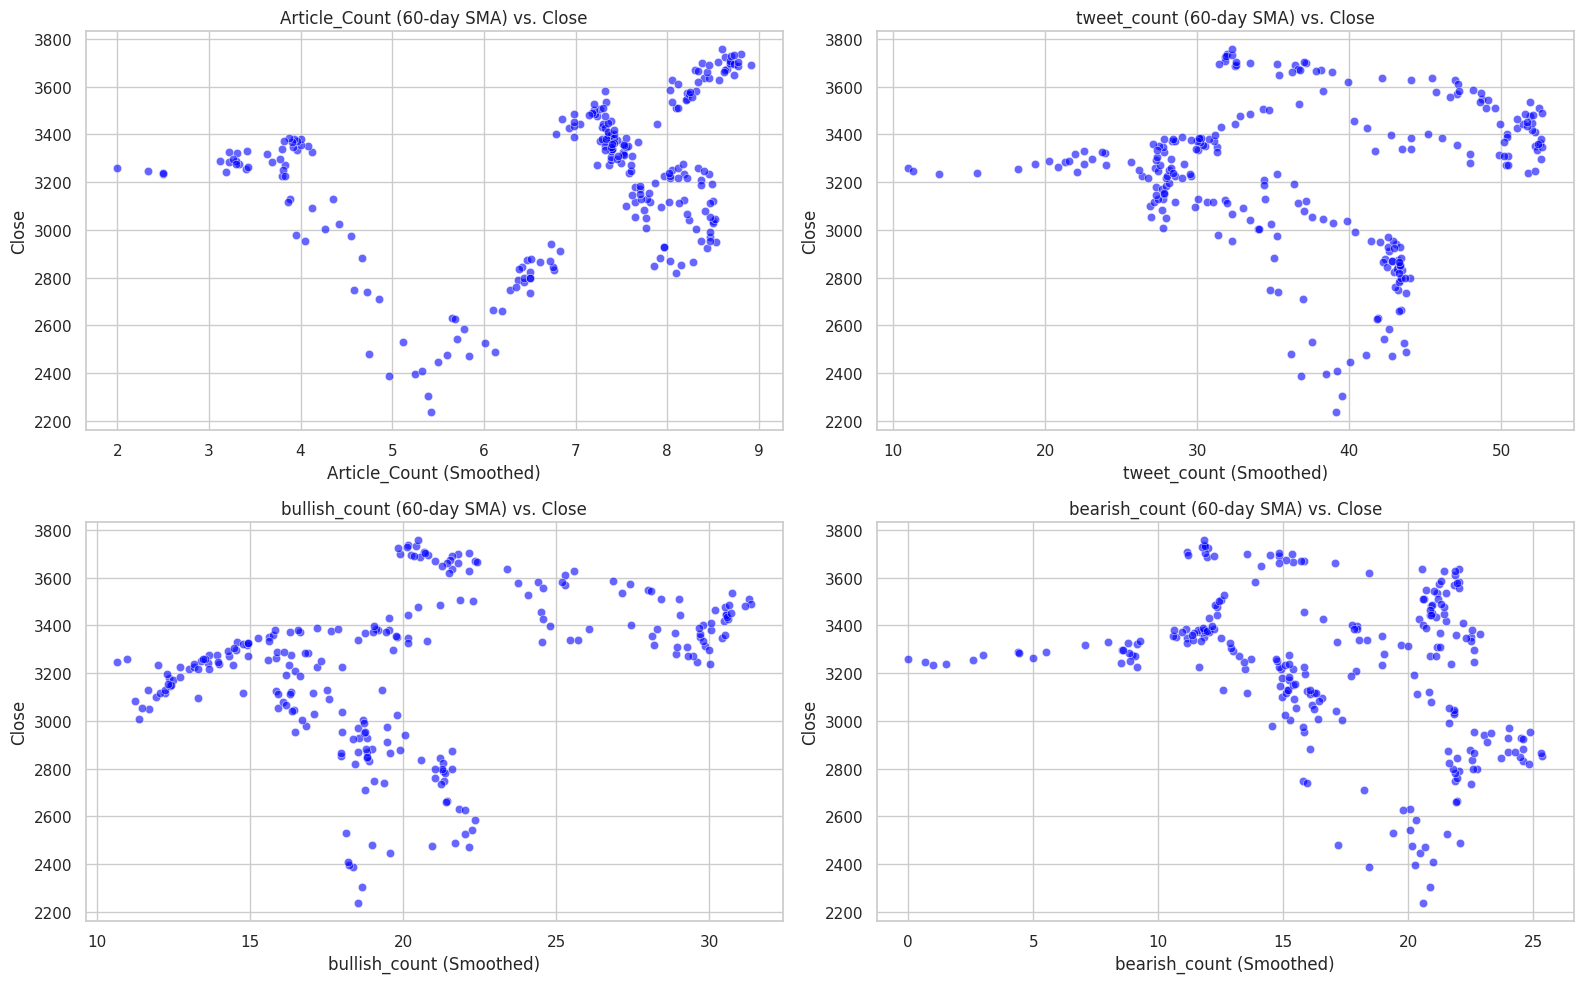

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for i, col in enumerate(count_cols):
    sns.scatterplot(
        data=merged_sp500,
        x=f"{col}_sma",
        y='Close',
        ax=axes[i],
        alpha=0.6,
        color='blue'
    )
    axes[i].set_title(f"{col} (60-day SMA) vs. Close")
    axes[i].set_xlabel(f"{col} (Smoothed)")

plt.tight_layout()
plt.show()

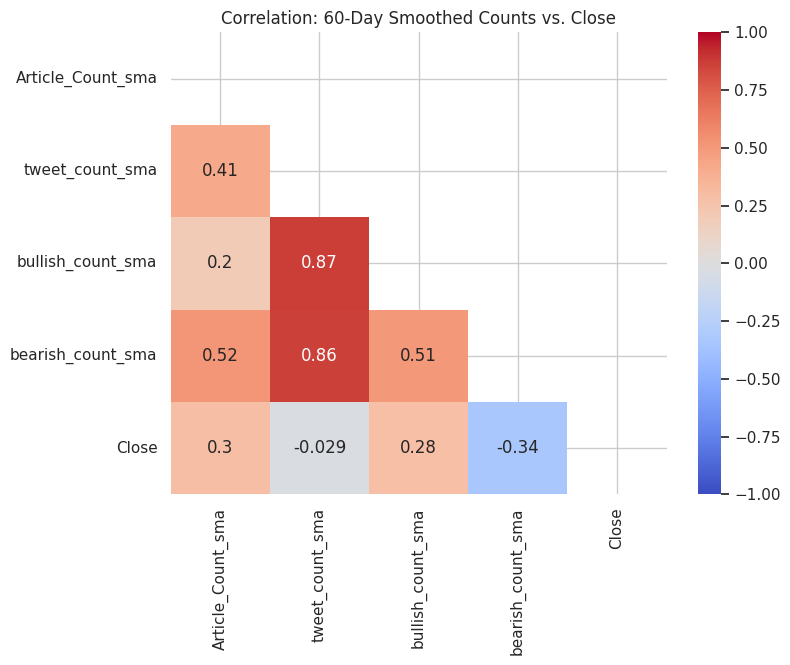

In [20]:
# Compute correlation matrix for smoothed counts and Close
smoothed_cols = [f"{col}_sma" for col in count_cols]
corr_matrix = merged_sp500[smoothed_cols + ['Close']].corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    mask=np.triu(np.ones_like(corr_matrix, dtype=bool))  # Hide upper triangle
)
plt.title("Correlation: 60-Day Smoothed Counts vs. Close")
plt.show()

## NASDAQ100

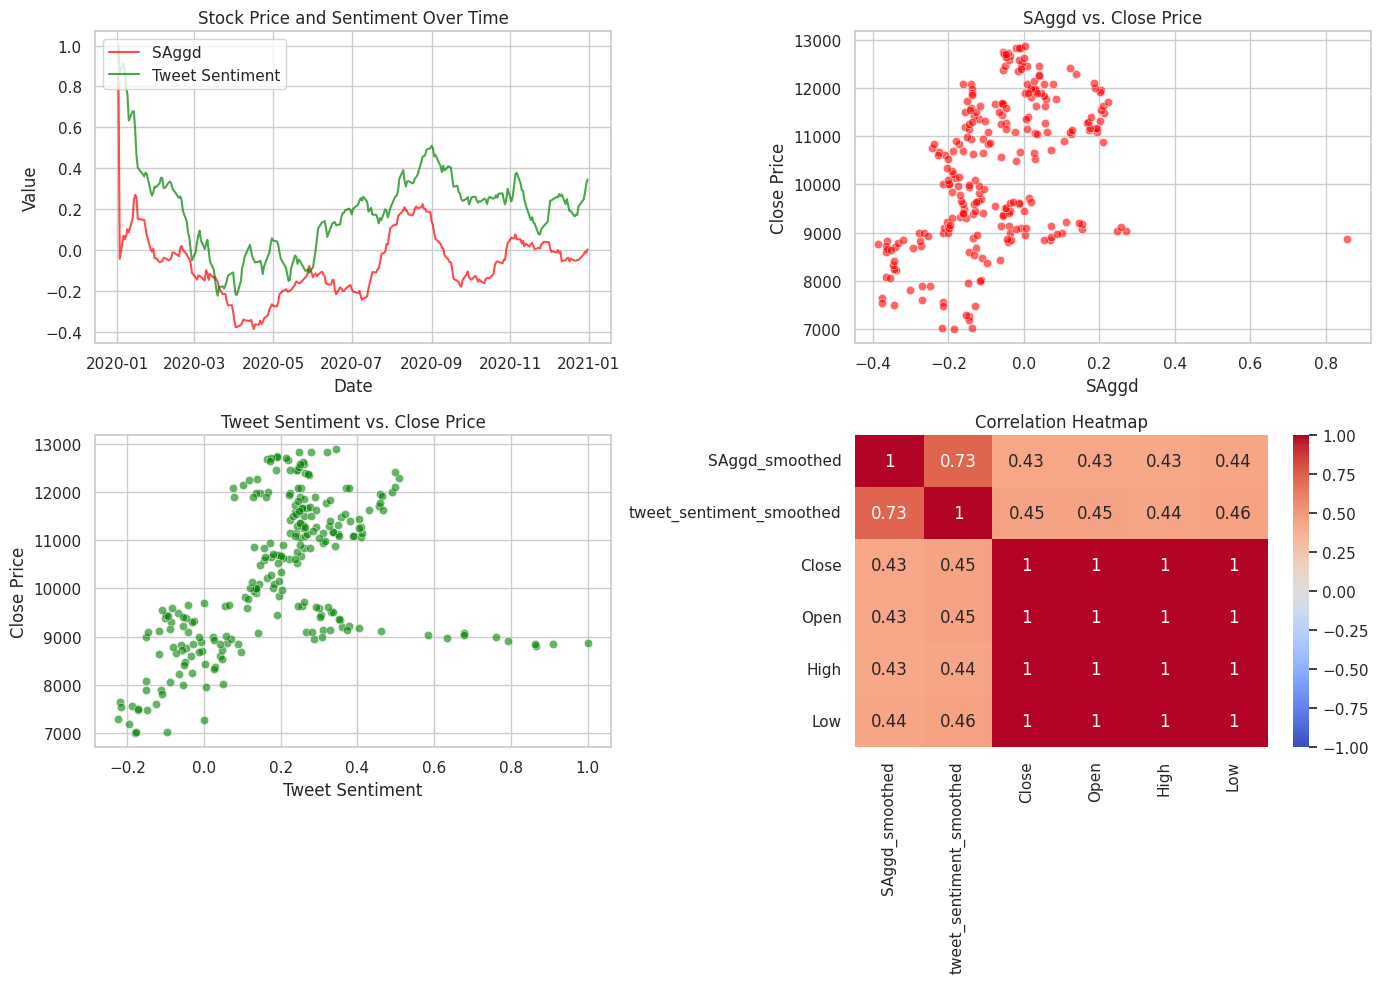

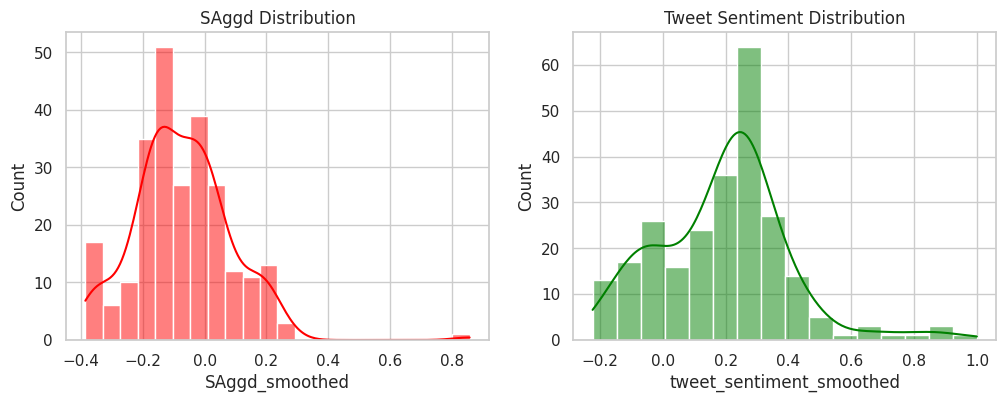

In [21]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 10))


window_size_news = 30
window_size_tweets = 30  # Days in the rolling window


# Apply to SAggd_sma (news sentiment)
merged_nasdaq100['SAggd_smoothed'] = (
    merged_nasdaq100['SAggd']
    .rolling(window=window_size_news, min_periods=1)
    .mean()
)

# Apply to tweet sentiment
merged_nasdaq100['tweet_sentiment_smoothed'] = (
    merged_nasdaq100['tweet_sentiment']
    .rolling(window=window_size_tweets, min_periods=1)
    .mean()
)

# --------------------------------------------
# 1. Time Series: Price and Sentiment Over Time
# --------------------------------------------
plt.subplot(2, 2, 1)

sns.lineplot(data=merged_nasdaq100, x='date', y='SAggd_smoothed', label='SAggd', color='red', alpha=0.7)
sns.lineplot(data=merged_nasdaq100, x='date', y='tweet_sentiment_smoothed', label='Tweet Sentiment', color='green', alpha=0.7)
plt.title('Stock Price and Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(loc='upper left')

# --------------------------------------------
# 2. Scatter Plots: Sentiment vs. Close Price
# --------------------------------------------
plt.subplot(2, 2, 2)
sns.scatterplot(data=merged_nasdaq100, x='SAggd_smoothed', y='Close', color='red', alpha=0.6)
plt.title('SAggd vs. Close Price')
plt.xlabel('SAggd')
plt.ylabel('Close Price')

plt.subplot(2, 2, 3)
sns.scatterplot(data=merged_nasdaq100, x='tweet_sentiment_smoothed', y='Close', color='green', alpha=0.6)
plt.title('Tweet Sentiment vs. Close Price')
plt.xlabel('Tweet Sentiment')
plt.ylabel('Close Price')

# --------------------------------------------
# 3. Correlation Heatmap (Original Variables)
# --------------------------------------------
plt.subplot(2, 2, 4)
corr_matrix = merged_nasdaq100[['SAggd_smoothed', 'tweet_sentiment_smoothed', 'Close', 'Open', 'High', 'Low']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')

# Adjust layout and show
plt.tight_layout()
plt.show()

# --------------------------------------------
# 4. Distribution Plots (Optional)
# --------------------------------------------
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(merged_nasdaq100['SAggd_smoothed'], kde=True, color='red', ax=ax[0])
sns.histplot(merged_nasdaq100['tweet_sentiment_smoothed'], kde=True, color='green', ax=ax[1])
ax[0].set_title('SAggd Distribution')
ax[1].set_title('Tweet Sentiment Distribution')
plt.show()

In [22]:
# Parameters
window_size = 60 # Days in the rolling window



# Columns to smooth (non-sentiment)
count_cols = ['Article_Count', 'tweet_count', 'bullish_count', 'bearish_count']

# Apply rolling mean to non-sentiment columns
for col in count_cols:

    merged_nasdaq100[f"{col}_sma"] = (
        merged_nasdaq100[col]
        .rolling(window=window_size, min_periods=1)
        .mean()  # Simple moving average (equal weights)
    )

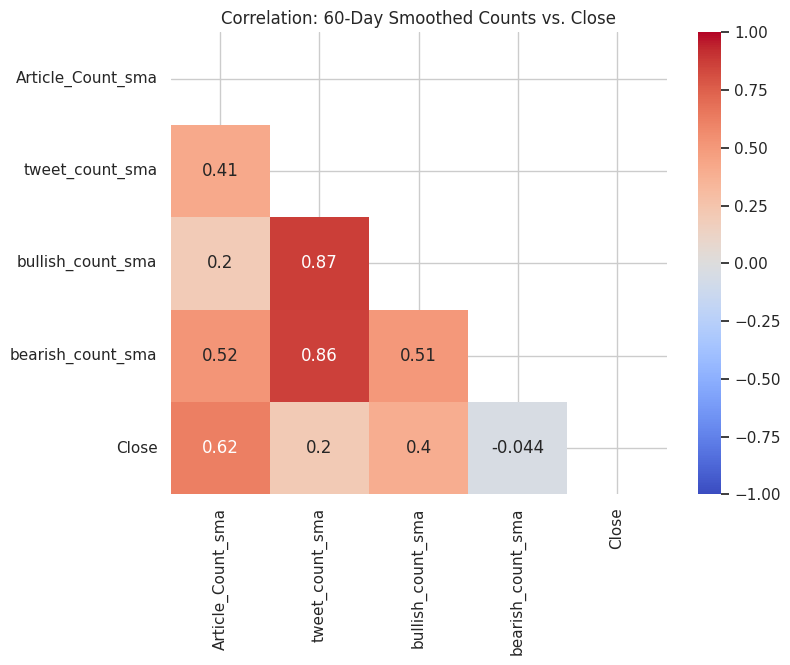

In [23]:
# Compute correlation matrix for smoothed counts and Close
smoothed_cols = [f"{col}_sma" for col in count_cols]
corr_matrix = merged_nasdaq100[smoothed_cols + ['Close']].corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    mask=np.triu(np.ones_like(corr_matrix, dtype=bool))  # Hide upper triangle
)
plt.title("Correlation: 60-Day Smoothed Counts vs. Close")
plt.show()

# Ordinary Least Square Regression

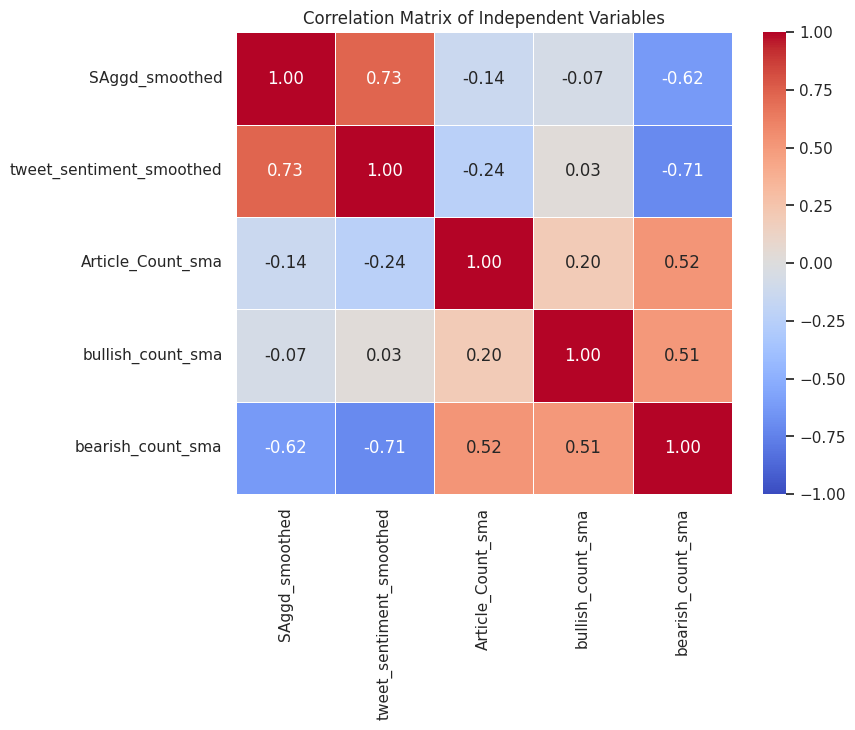

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the independent variables (X)
X = merged_sp500[['SAggd_smoothed', 'tweet_sentiment_smoothed', 'Article_Count_sma', 'bullish_count_sma', 'bearish_count_sma']]

# Compute the correlation matrix
corr_matrix = X.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Independent Variables')
plt.show()

## Unstandardized coefficients

## S&P 500

In [25]:

X = merged_sp500[['SAggd_smoothed', 'tweet_sentiment_smoothed', 'Article_Count_sma', 'bullish_count_sma', 'bearish_count_sma']]
X = sm.add_constant(X)  # Adds intercept term
y = merged_sp500['Close']

# 5. Perform OLS regression
model = sm.OLS(y, X, missing='drop').fit()

# 6. Display results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     173.2
Date:                Mon, 05 May 2025   Prob (F-statistic):           1.86e-78
Time:                        10:06:45   Log-Likelihood:                -1620.4
No. Observations:                 252   AIC:                             3253.
Df Residuals:                     246   BIC:                             3274.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [26]:
import statsmodels.api as sm
import pandas as pd

# Assuming merged_sp500 is already loaded

X = merged_sp500[['SAggd_smoothed', 'tweet_sentiment_smoothed', 'Article_Count_sma', 'bullish_count_sma', 'bearish_count_sma']]
X = sm.add_constant(X)  # Adds intercept term
y = merged_sp500['Close']

# 5. Perform OLS regression and get results with HAC standard errors

nobs = merged_sp500.shape[0]
# Example heuristic for lags (Newey-West suggestion)
lags = int(4 * (nobs/100)**(2/9))
print(f"Using maxlags = {lags} for HAC standard errors")


model = sm.OLS(y, X, missing='drop')
# Fit the model and specify HAC covariance type with maximum lags
results = model.fit(cov_type='HAC', cov_kwds={'maxlags': lags})


# 6. Display results
print(results.summary())

Using maxlags = 4 for HAC standard errors
                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     74.75
Date:                Mon, 05 May 2025   Prob (F-statistic):           2.17e-47
Time:                        10:06:45   Log-Likelihood:                -1620.4
No. Observations:                 252   AIC:                             3253.
Df Residuals:                     246   BIC:                             3274.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------

In [27]:

y = merged_sp500['Close']
variable_names = {
    'SAggd_smoothed': 'Smoothed SAggd',
    'tweet_sentiment_smoothed': 'Smoothed Tweet Sentiment',
    'Article_Count_sma': 'Article Count',
    'bullish_count_sma': 'Bullish Count',
    'bearish_count_sma': 'Bearish Count'
}
# Independent variables (without constant)
X = merged_sp500[list(variable_names.keys())]

# Add constant for intercept
X_const = sm.add_constant(X)

# Fit OLS model
model = sm.OLS(y, X_const).fit()

# Calculate standardized coefficients (beta coefficients)
std_coef = (model.params[1:] * X.std()) / y.std()  # Exclude intercept

# Create results dataframe
results_df = pd.DataFrame({
    'Variable': [variable_names[col] for col in X.columns],
    'Unstandardized': model.params[1:],
    'Standard Error': model.bse[1:],
    'Standardized': std_coef,
    'p-value': model.pvalues[1:]
})

# Add asterisk for significant p-values
results_df['Significance'] = results_df['p-value'].apply(lambda p: '*' if p < 0.05 else '')

# Format numerical values
results_df['Unstandardized'] = results_df.apply(
    lambda x: f"{x['Unstandardized']:.4f}{x['Significance']}", axis=1)
results_df['Standardized'] = results_df.apply(
    lambda x: f"{x['Standardized']:.4f}{x['Significance']}", axis=1)
results_df['p-value'] = results_df['p-value'].apply(lambda x: f"{x:.3f}")

# Create final presentation table
final_table = results_df[['Variable', 'Unstandardized', 'Standardized', 'p-value']]
# Display the table
final_table.to_csv('/content/regression_sp500.csv', index=False)
print(final_table)


                                          Variable Unstandardized  \
SAggd_smoothed                      Smoothed SAggd      313.8380*   
tweet_sentiment_smoothed  Smoothed Tweet Sentiment      268.7857*   
Article_Count_sma                    Article Count      116.2204*   
bullish_count_sma                    Bullish Count       30.7846*   
bearish_count_sma                    Bearish Count      -42.6839*   

                         Standardized p-value  
SAggd_smoothed                0.1539*   0.001  
tweet_sentiment_smoothed      0.1751*   0.004  
Article_Count_sma             0.6244*   0.000  
bullish_count_sma             0.5211*   0.000  
bearish_count_sma            -0.7089*   0.000  


## NASDAQ-100

In [28]:
X = merged_nasdaq100[['SAggd_smoothed', 'tweet_sentiment_smoothed', 'Article_Count_sma', 'bullish_count_sma', 'bearish_count_sma']]
X = sm.add_constant(X)  # Adds intercept term
y = merged_nasdaq100['Close']

# 5. Perform OLS regression
model = sm.OLS(y, X, missing='drop').fit()

# 6. Display results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     398.5
Date:                Mon, 05 May 2025   Prob (F-statistic):          9.67e-116
Time:                        10:06:46   Log-Likelihood:                -1923.1
No. Observations:                 252   AIC:                             3858.
Df Residuals:                     246   BIC:                             3879.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [29]:
import statsmodels.api as sm
import pandas as pd

# Assuming merged_sp500 is already loaded

X = merged_nasdaq100[['SAggd_smoothed', 'tweet_sentiment_smoothed', 'Article_Count_sma', 'bullish_count_sma', 'bearish_count_sma']]
X = sm.add_constant(X)  # Adds intercept term
y = merged_nasdaq100['Close']

nobs = merged_nasdaq100.shape[0]
# Example heuristic for lags (Newey-West suggestion)
lags = int(4 * (nobs/100)**(2/9))
print(f"Using maxlags = {lags} for HAC standard errors")


model = sm.OLS(y, X, missing='drop')
# Fit the model and specify HAC covariance type with maximum lags
results = model.fit(cov_type='HAC', cov_kwds={'maxlags': lags})


# 6. Display results
print(results.summary())

Using maxlags = 4 for HAC standard errors
                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     178.3
Date:                Mon, 05 May 2025   Prob (F-statistic):           1.17e-79
Time:                        10:06:46   Log-Likelihood:                -1923.1
No. Observations:                 252   AIC:                             3858.
Df Residuals:                     246   BIC:                             3879.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------

In [30]:


y = merged_nasdaq100['Close']
variable_names = {
    'SAggd_smoothed': 'Smoothed SAggd',
    'tweet_sentiment_smoothed': 'Smoothed Tweet Sentiment',
    'Article_Count_sma': 'Article Count',
    'bullish_count_sma': 'Bullish Count',
    'bearish_count_sma': 'Bearish Count'
}
# Independent variables (without constant)
X = merged_nasdaq100[list(variable_names.keys())]

# Add constant for intercept
X_const = sm.add_constant(X)

# Fit OLS model
model = sm.OLS(y, X_const).fit()

# Calculate standardized coefficients (beta coefficients)
std_coef = (model.params[1:] * X.std()) / y.std()  # Exclude intercept

# Create results dataframe
results_df = pd.DataFrame({
    'Variable': [variable_names[col] for col in X.columns],
    'Unstandardized': model.params[1:],
    'Standard Error': model.bse[1:],
    'Standardized': std_coef,
    'p-value': model.pvalues[1:]
})

# Add asterisk for significant p-values
results_df['Significance'] = results_df['p-value'].apply(lambda p: '*' if p < 0.05 else '')

# Format numerical values
results_df['Unstandardized'] = results_df.apply(
    lambda x: f"{x['Unstandardized']:.4f}{x['Significance']}", axis=1)
results_df['Standardized'] = results_df.apply(
    lambda x: f"{x['Standardized']:.4f}{x['Significance']}", axis=1)
results_df['p-value'] = results_df['p-value'].apply(lambda x: f"{x:.3f}")

# Create final presentation table
final_table = results_df[['Variable', 'Unstandardized', 'Standardized', 'p-value']]
# Display the table
final_table.to_csv('/content/regression_nasdaq100.csv', index=False)
print(final_table)


                                          Variable Unstandardized  \
SAggd_smoothed                      Smoothed SAggd     1088.7700*   
tweet_sentiment_smoothed  Smoothed Tweet Sentiment     1053.1206*   
Article_Count_sma                    Article Count      767.6470*   
bullish_count_sma                    Bullish Count      145.7725*   
bearish_count_sma                    Bearish Count     -168.1644*   

                         Standardized p-value  
SAggd_smoothed                0.1132*   0.001  
tweet_sentiment_smoothed      0.1455*   0.001  
Article_Count_sma             0.8747*   0.000  
bullish_count_sma             0.5234*   0.000  
bearish_count_sma            -0.5924*   0.000  


## Standardized Coefficients

In [31]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler


# Define predictor variables (X) and dependent variable (y)
X = merged_sp500[['SAggd_smoothed', 'tweet_sentiment_smoothed', 'Article_Count_sma', 'bullish_count_sma', 'bearish_count_sma']]
y = merged_sp500['Close']

# Standardize the predictor variables (X)
scaler_X = StandardScaler()
X_standardized = scaler_X.fit_transform(X)
X_standardized = pd.DataFrame(X_standardized, columns=X.columns, index=X.index)

# Standardize the dependent variable (y)
scaler_y = StandardScaler()
# Reshape y to 2D array as StandardScaler expects 2D input
y_reshaped = y.values.reshape(-1, 1)
y_standardized = scaler_y.fit_transform(y_reshaped)
# Convert back to a Series with the same index as y
y_standardized = pd.Series(y_standardized.flatten(), index=y.index, name='Close_standardized')

# Add constant term to standardized predictors
X_standardized = sm.add_constant(X_standardized)

# Perform OLS regression with standardized variables
model = sm.OLS(y_standardized, X_standardized, missing='drop').fit()

# Display results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Close_standardized   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     173.2
Date:                Mon, 05 May 2025   Prob (F-statistic):           1.86e-78
Time:                        10:06:46   Log-Likelihood:                -167.49
No. Observations:                 252   AIC:                             347.0
Df Residuals:                     246   BIC:                             368.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [32]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler


# Define predictor variables (X) and dependent variable (y)
X = merged_nasdaq100[['SAggd_smoothed', 'tweet_sentiment_smoothed', 'Article_Count_sma', 'bullish_count_sma', 'bearish_count_sma']]
y = merged_nasdaq100['Close']

# Standardize the predictor variables (X)
scaler_X = StandardScaler()
X_standardized = scaler_X.fit_transform(X)
X_standardized = pd.DataFrame(X_standardized, columns=X.columns, index=X.index)

# Standardize the dependent variable (y)
scaler_y = StandardScaler()
# Reshape y to 2D array as StandardScaler expects 2D input
y_reshaped = y.values.reshape(-1, 1)
y_standardized = scaler_y.fit_transform(y_reshaped)
# Convert back to a Series with the same index as y
y_standardized = pd.Series(y_standardized.flatten(), index=y.index, name='Close_standardized')

# Add constant term to standardized predictors
X_standardized = sm.add_constant(X_standardized)

# Perform OLS regression with standardized variables
model = sm.OLS(y_standardized, X_standardized, missing='drop').fit()

# Display results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Close_standardized   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     398.5
Date:                Mon, 05 May 2025   Prob (F-statistic):          9.67e-116
Time:                        10:06:47   Log-Likelihood:                -79.341
No. Observations:                 252   AIC:                             170.7
Df Residuals:                     246   BIC:                             191.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

## Indirect effects

In [33]:
cols_to_standardize = ['Article_Count_sma', 'SAggd_smoothed', 'bearish_count_sma', 'bullish_count_sma', 'tweet_sentiment_smoothed', 'Close']
merged_sp500_std = merged_sp500[cols_to_standardize].apply(lambda x: (x - x.mean()) / x.std())

In [34]:
# Model 1: SAggd ~ Article_count
X1 = sm.add_constant(merged_sp500_std['Article_Count_sma'])
model_saggd = sm.OLS(merged_sp500_std['SAggd_smoothed'], X1).fit()



# Model 4: tweet_sentiment ~ SAggd + bearish_count + bullish_count
X2 = sm.add_constant(merged_sp500_std[['SAggd_smoothed', 'bearish_count_sma', 'bullish_count_sma']])
model_tweet = sm.OLS(merged_sp500_std['tweet_sentiment_smoothed'], X2).fit()

# Model 5: Close ~ All variables
X3 = sm.add_constant(merged_sp500_std[['Article_Count_sma', 'SAggd_smoothed', 'bearish_count_sma', 'bullish_count_sma', 'tweet_sentiment_smoothed']])
model_close = sm.OLS(merged_sp500_std['Close'], X3).fit()
# Coefficients from Model 5 (direct effects)
direct_effects = {
    'Article_Count_sma': model_close.params['Article_Count_sma'],
    'SAggd_smoothed': model_close.params['SAggd_smoothed'],
    'bearish_count_sma': model_close.params['bearish_count_sma'],
    'bullish_count_sma': model_close.params['bullish_count_sma'],
    'tweet_sentiment_smoothed': model_close.params['tweet_sentiment_smoothed']
}

# Coefficients for indirect paths
beta_article_to_saggd = model_saggd.params['Article_Count_sma']
beta_saggd_to_tweet = model_tweet.params['SAggd_smoothed']
beta_bear_to_tweet = model_tweet.params['bearish_count_sma']
beta_bull_to_tweet = model_tweet.params['bullish_count_sma']
beta_tweet_to_close = model_close.params['tweet_sentiment_smoothed']
indirect_effects = {
    'Article_Count_sma': (
        # Path 1: Article_count → SAggd → Close
        beta_article_to_saggd * direct_effects['SAggd_smoothed'] +
        # Path 2: Article_count → SAggd → tweet_sentiment → Close
        beta_article_to_saggd * beta_saggd_to_tweet * beta_tweet_to_close
    ),
    'SAggd_smoothed': (
        # Path: SAggd → tweet_sentiment → Close
        beta_saggd_to_tweet * beta_tweet_to_close
    ),
    'bearish_count_sma': (
        # Path: bearish_count → tweet_sentiment → Close
        beta_bear_to_tweet * beta_tweet_to_close
    ),
    'bullish_count_sma': (
        # Path: bullish_count → tweet_sentiment → Close
        beta_bull_to_tweet * beta_tweet_to_close
    ),
    'tweet_sentiment_smoothed': 0.0  # No indirect paths
}
# For string formatting version
results = pd.DataFrame({
    'Variable': ['Article Count', 'Smoothed SAggd', 'Bearish Count', 'Bullish Count', 'Smoothed Tweet Sentiment'],
    'Direct Effect (β)': [f"{direct_effects[k]:.4f}" for k in direct_effects],
    'Indirect Effect (β)': [f"{indirect_effects[k]:.4f}" for k in indirect_effects],
    'Total Effect (β)': [f"{(direct_effects[k] + indirect_effects[k]):.4f}" for k in direct_effects]
})
results.to_csv("/content/direct-indirect_sp500.csv")
print(results)

                   Variable Direct Effect (β) Indirect Effect (β)  \
0             Article Count            0.6244             -0.0280   
1            Smoothed SAggd            0.1539              0.0528   
2             Bearish Count           -0.7089             -0.1273   
3             Bullish Count            0.5211              0.0723   
4  Smoothed Tweet Sentiment            0.1751              0.0000   

  Total Effect (β)  
0           0.5964  
1           0.2067  
2          -0.8362  
3           0.5934  
4           0.1751  


In [35]:
cols_to_standardize = ['Article_Count_sma', 'SAggd_smoothed', 'bearish_count_sma', 'bullish_count_sma', 'tweet_sentiment_smoothed', 'Close']
merged_nasdaq100_std = merged_nasdaq100[cols_to_standardize].apply(lambda x: (x - x.mean()) / x.std())

In [36]:

# Model 1: SAggd ~ Article_count
X1 = sm.add_constant(merged_nasdaq100_std['Article_Count_sma'])
model_saggd = sm.OLS(merged_nasdaq100_std['SAggd_smoothed'], X1).fit()



# Model 4: tweet_sentiment ~ SAggd + bearish_count + bullish_count
X2 = sm.add_constant(merged_nasdaq100_std[['SAggd_smoothed', 'bearish_count_sma', 'bullish_count_sma']])
model_tweet = sm.OLS(merged_nasdaq100_std['tweet_sentiment_smoothed'], X2).fit()

# Model 5: Close ~ All variables
X3 = sm.add_constant(merged_nasdaq100_std[['Article_Count_sma', 'SAggd_smoothed', 'bearish_count_sma', 'bullish_count_sma', 'tweet_sentiment_smoothed']])
model_close = sm.OLS(merged_nasdaq100_std['Close'], X3).fit()
# Coefficients from Model 5 (direct effects)
direct_effects = {
    'Article_Count_sma': model_close.params['Article_Count_sma'],
    'SAggd_smoothed': model_close.params['SAggd_smoothed'],
    'bearish_count_sma': model_close.params['bearish_count_sma'],
    'bullish_count_sma': model_close.params['bullish_count_sma'],
    'tweet_sentiment_smoothed': model_close.params['tweet_sentiment_smoothed']
}

# Coefficients for indirect paths
beta_article_to_saggd = model_saggd.params['Article_Count_sma']
beta_saggd_to_tweet = model_tweet.params['SAggd_smoothed']
beta_bear_to_tweet = model_tweet.params['bearish_count_sma']
beta_bull_to_tweet = model_tweet.params['bullish_count_sma']
beta_tweet_to_close = model_close.params['tweet_sentiment_smoothed']
indirect_effects = {
    'Article_Count_sma': (
        # Path 1: Article_count → SAggd → Close
        beta_article_to_saggd * direct_effects['SAggd_smoothed'] +
        # Path 2: Article_count → SAggd → tweet_sentiment → Close
        beta_article_to_saggd * beta_saggd_to_tweet * beta_tweet_to_close
    ),
    'SAggd_smoothed': (
        # Path: SAggd → tweet_sentiment → Close
        beta_saggd_to_tweet * beta_tweet_to_close
    ),
    'bearish_count_sma': (
        # Path: bearish_count → tweet_sentiment → Close
        beta_bear_to_tweet * beta_tweet_to_close
    ),
    'bullish_count_sma': (
        # Path: bullish_count → tweet_sentiment → Close
        beta_bull_to_tweet * beta_tweet_to_close
    ),
    'tweet_sentiment_smoothed': 0.0  # No indirect paths
}
# For string formatting version
results = pd.DataFrame({
    'Variable': ['Article Count', 'Smoothed SAggd', 'Bearish Count', 'Bullish Count', 'Smoothed Tweet Sentiment'],
    'Direct Effect (β)': [f"{direct_effects[k]:.4f}" for k in direct_effects],
    'Indirect Effect (β)': [f"{indirect_effects[k]:.4f}" for k in indirect_effects],
    'Total Effect (β)': [f"{(direct_effects[k] + indirect_effects[k]):.4f}" for k in direct_effects]
})
results.to_csv("/content/direct-indirect_nasdaq100.csv")
print(results)

                   Variable Direct Effect (β) Indirect Effect (β)  \
0             Article Count            0.8747             -0.0213   
1            Smoothed SAggd            0.1132              0.0439   
2             Bearish Count           -0.5924             -0.1058   
3             Bullish Count            0.5234              0.0601   
4  Smoothed Tweet Sentiment            0.1455              0.0000   

  Total Effect (β)  
0           0.8535  
1           0.1571  
2          -0.6981  
3           0.5834  
4           0.1455  


# ARIMAX

## S&P500

ADF Test for y:
ADF Statistic: -1.2559249452866679
p-value: 0.6490879241854114

ADF Test for differenced y:
ADF Statistic: -4.098135216536797
p-value: 0.000975421366880321


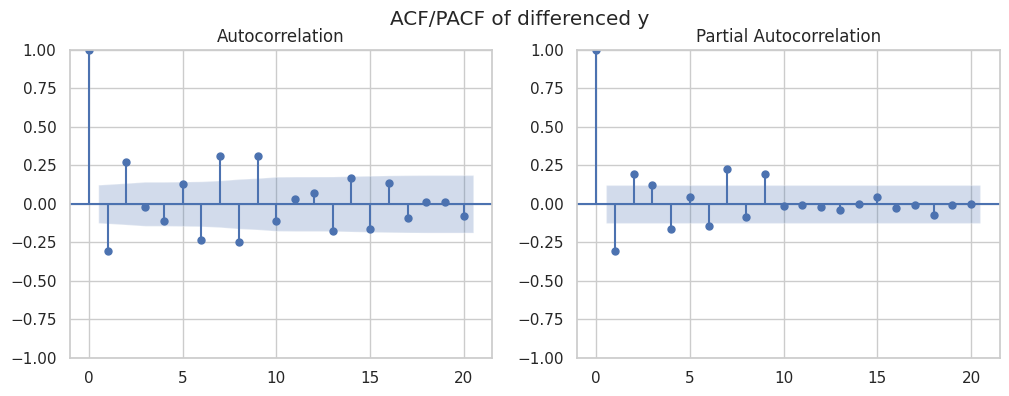


Fitting ARIMAX model with order (1, 1, 1) using original exogenous variables.
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  252
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1354.416
Date:                Mon, 05 May 2025   AIC                           2724.831
Time:                        10:06:50   BIC                           2753.035
Sample:                             0   HQIC                          2736.181
                                - 252                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
SAggd              29.8934      8.969      3.333      0.001      12.314      47.473
tweet_sentiment    15.3797      7.976

In [37]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller # Useful for stationarity testing


original_independent_vars = ['SAggd', 'tweet_sentiment', 'Article_Count', 'bullish_count', 'bearish_count']

# Ensure your data is sorted by time
merged_sp500 = merged_sp500.sort_index() # Assuming time is in the index

y = merged_sp500['Close']

X_original = merged_sp500[original_independent_vars]

#--- (Optional but Recommended) Check for Stationarity ---
# Perform unit root tests on y and its potential differences to determine the 'I' (d) order.
print("ADF Test for y:")
adf_result_y = adfuller(y)
print(f"ADF Statistic: {adf_result_y[0]}")
print(f"p-value: {adf_result_y[1]}")
# If p-value > 0.05, y is likely non-stationary, consider differencing.

# If differencing is needed (e.g., d=1)
y_diff = y.diff().dropna()
adf_result_y_diff = adfuller(y_diff)
print("\nADF Test for differenced y:")
print(f"ADF Statistic: {adf_result_y_diff[0]}")
print(f"p-value: {adf_result_y_diff[1]}") # If p-value <= 0.05, differenced series is likely stationary

# Plot ACF/PACF of y (or y_diff) to help determine p and q
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sm.graphics.tsa.plot_acf(y_diff, lags=20, ax=axes[0])
sm.graphics.tsa.plot_pacf(y_diff, lags=20, ax=axes[1])
plt.suptitle("ACF/PACF of differenced y")
plt.show()


# 3. Define the ARIMA order (p, d, q)
# This is a crucial step based on analysis from step 2 or theoretical knowledge.
# Replace with your determined orders: (p, d, q)
arima_order = (1, 1, 1) # Example order

print(f"\nFitting ARIMAX model with order {arima_order} using original exogenous variables.")

# 4. Fit the ARIMAX model using original exogenous variables
# If you wanted to include lags, you'd add columns like X_original['var_name'].shift(1)
# to the X_original DataFrame *before* passing it to the model.
model = ARIMA(y, order=arima_order, exog=X_original)
results = model.fit()

# 5. Display Results
print(results.summary())

In [38]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA


# --- 1. Standardize the variables ---
# Standardize y BEFORE differencing
y_mean = y.mean()
y_std = y.std()
y_standardized = (y - y_mean) / y_std

# Standardize X_original
X_mean = X_original.mean()
X_std = X_original.std()
X_standardized = (X_original - X_mean) / X_std

# --- 2. Fit the ARIMAX model with standardized variables ---
# The ARIMA model will internally difference y_standardized since order[1] = 1
print(f"\nFitting ARIMAX model with order {arima_order} using STANDARDIZED variables.")

model_standardized = ARIMA(y_standardized, order=arima_order, exog=X_standardized)
results_standardized = model_standardized.fit()

# --- 3. Display Results for Standardized Model ---
print("\nStandardized ARIMAX Results:")
print(results_standardized.summary())

# --- Extract coefficients and p-values ---

import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA



# --- Assuming your original data loading and model fitting (results and results_standardized) are done before this ---

# --- Corrected code to extract data from summary tables ---

def extract_params_from_summary(summary_obj):
    """Extracts coef and p-value from the parameters table of a statsmodels summary."""
    params_table_data = {}
    try:
        # The parameters table is usually the second table (index 1)
        params_table = summary_obj.tables[1]
        header = params_table.data[0]
        data_rows = params_table.data[1:] # Exclude header

        # Find column indices
        try:
            coef_col_idx = header.index('coef')
            p_value_col_idx = header.index('P>|z|')
            var_name_col_idx = 0 # Variable names are typically in the first column
        except ValueError as e:
            print(f"Error: Could not find expected columns in summary table header: {e}")
            return None # Indicate failure

        for row in data_rows:
            if len(row) > max(coef_col_idx, p_value_col_idx):
                var_name = row[var_name_col_idx]
                try:
                    # Attempt to convert values to float
                    coef_val = float(row[coef_col_idx])
                    p_val = float(row[p_value_col_idx])
                    params_table_data[var_name] = {'coef': coef_val, 'p-value': p_val}
                except ValueError:
                    print(f"Warning: Could not convert data to float for variable {var_name} in summary.")
                    params_table_data[var_name] = {'coef': row[coef_col_idx], 'p-value': row[p_value_col_idx]} # Keep as string if conversion fails
            else:
                 print(f"Warning: Row length mismatch in summary table data: {row}")
                 # Decide how to handle incomplete rows, skipping for now

    except IndexError:
        print("Error: Could not find the expected parameters table (index 1) in the summary.")
        return None # Indicate failure
    except Exception as e:
        print(f"An unexpected error occurred while parsing summary table: {e}")
        return None

    return pd.DataFrame.from_dict(params_table_data, orient='index')

# --- Extract data using the corrected function ---

# Data from the model fitted with ORIGINAL data (for unstandardized coefficients and p-values)
unstandardized_results_df = extract_params_from_summary(results.summary())

# Data from the model fitted with STANDARDIZED data (for standardized coefficients)
standardized_results_df = extract_params_from_summary(results_standardized.summary())


# --- Combine the results into a single DataFrame for your LaTeX table ---

if unstandardized_results_df is not None and standardized_results_df is not None:
    # Start with unstandardized coefficients and p-values
    combined_results_df = unstandardized_results_df[['coef', 'p-value']].copy()
    combined_results_df.rename(columns={'coef': 'Unstandardized Coeff.'}, inplace=True)

    # Add standardized coefficients - only for exogenous variables typically
    # Ensure alignment by variable name index
    combined_results_df['Standardized Coeff.'] = standardized_results_df['coef']

    # For AR, MA, and const terms, set Standardized Coeff. to N/A
    # Check which of these terms are present in the index
    for term in ['ar.L1', 'ma.L1', 'const']:
        if term in combined_results_df.index:
             combined_results_df.loc[term, 'Standardized Coeff.'] = 'N/A' # Or pd.NA

    print("\nCombined Results Table Data (Ready for LaTeX):")
    print(combined_results_df)

    # --- You will now use the values from combined_results_df to fill your LaTeX table ---

else:
    print("\nCould not generate combined results table due to errors during summary parsing.")


Fitting ARIMAX model with order (1, 1, 1) using STANDARDIZED variables.

Standardized ARIMAX Results:
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  252
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  93.321
Date:                Mon, 05 May 2025   AIC                           -170.643
Time:                        10:06:53   BIC                           -142.439
Sample:                             0   HQIC                          -159.293
                                - 252                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
SAggd               0.0403      0.012      3.338      0.001       0.017       0.064
tweet_sentime

<ipython-input-38-93202e03e6af>:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'N/A' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  combined_results_df.loc[term, 'Standardized Coeff.'] = 'N/A' # Or pd.NA


## NASDAQ-100

ADF Test for y:
ADF Statistic: -0.4345163122761825
p-value: 0.9041743269553553

ADF Test for differenced y:
ADF Statistic: -4.562531212424797
p-value: 0.00015134550702262226


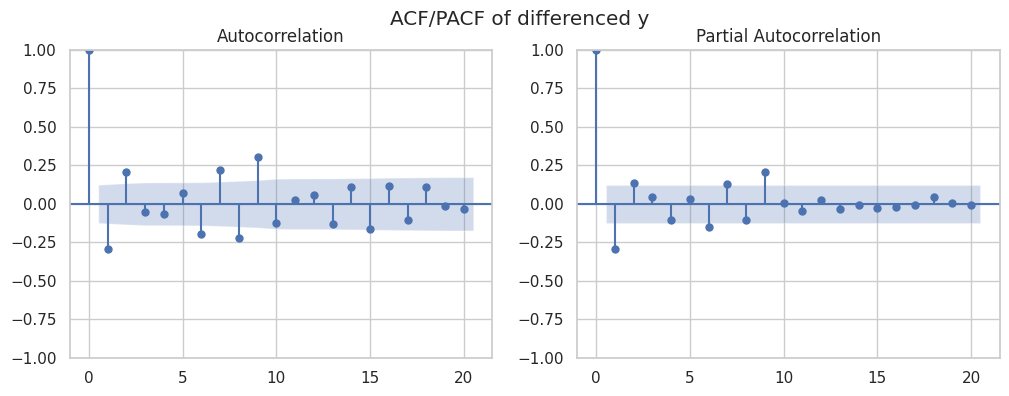


Fitting ARIMAX model with order (1, 1, 1) using original exogenous variables.
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  252
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1661.068
Date:                Mon, 05 May 2025   AIC                           3338.136
Time:                        10:06:56   BIC                           3366.340
Sample:                             0   HQIC                          3349.486
                                - 252                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
SAggd              58.6291     29.654      1.977      0.048       0.508     116.750
tweet_sentiment    70.2598     26.056

In [39]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
# from statsmodels.tsa.stattools import adfuller # Useful for stationarity testing


original_independent_vars = ['SAggd', 'tweet_sentiment', 'Article_Count', 'bullish_count', 'bearish_count']

# Ensure your data is sorted by time
merged_nasdaq100 = merged_nasdaq100.sort_index() # Assuming time is in the index
X_original = merged_nasdaq100[original_independent_vars]
y = merged_nasdaq100['Close']
#--- (Optional but Recommended) Check for Stationarity ---
# Perform unit root tests on y and its potential differences to determine the 'I' (d) order.
print("ADF Test for y:")
adf_result_y = adfuller(y)
print(f"ADF Statistic: {adf_result_y[0]}")
print(f"p-value: {adf_result_y[1]}")
# If p-value > 0.05, y is likely non-stationary, consider differencing.

# If differencing is needed (e.g., d=1)
y_diff = y.diff().dropna()
adf_result_y_diff = adfuller(y_diff)
print("\nADF Test for differenced y:")
print(f"ADF Statistic: {adf_result_y_diff[0]}")
print(f"p-value: {adf_result_y_diff[1]}") # If p-value <= 0.05, differenced series is likely stationary

# Plot ACF/PACF of y (or y_diff) to help determine p and q
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sm.graphics.tsa.plot_acf(y_diff, lags=20, ax=axes[0])
sm.graphics.tsa.plot_pacf(y_diff, lags=20, ax=axes[1])
plt.suptitle("ACF/PACF of differenced y")
plt.show()


# 3. Define the ARIMA order (p, d, q)
# This is a crucial step based on analysis from step 2 or theoretical knowledge.
# Replace with your determined orders: (p, d, q)
arima_order = (1, 1, 1) # Example order

print(f"\nFitting ARIMAX model with order {arima_order} using original exogenous variables.")

# 4. Fit the ARIMAX model using original exogenous variables
# If you wanted to include lags, you'd add columns like X_original['var_name'].shift(1)
# to the X_original DataFrame *before* passing it to the model.
model = ARIMA(y, order=arima_order, exog=X_original)
results = model.fit(method_kwargs={'maxiter': 1000})

# 5. Display Results
print(results.summary())

ADF Test for y:
ADF Statistic: -0.4345163122761825
p-value: 0.9041743269553553

ADF Test for differenced y:
ADF Statistic: -4.562531212424797
p-value: 0.00015134550702262226


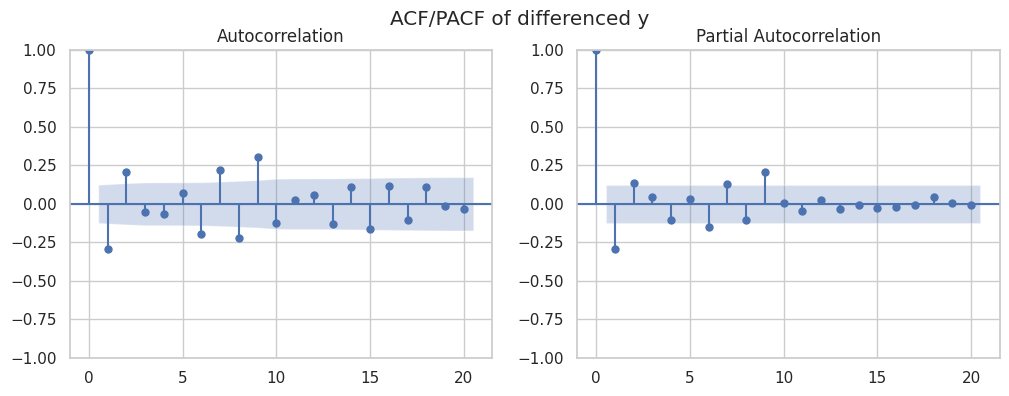


Fitting ARIMAX model with order (1, 1, 1) using original exogenous variables.
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  252
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1661.068
Date:                Mon, 05 May 2025   AIC                           3338.136
Time:                        10:07:01   BIC                           3366.340
Sample:                             0   HQIC                          3349.486
                                - 252                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
SAggd              58.6291     29.654      1.977      0.048       0.508     116.750
tweet_sentiment    70.2598     26.056

<ipython-input-40-55a4a42ebfcd>:146: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'N/A' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  combined_results_df.loc[term, 'Standardized Coeff.'] = 'N/A' # Or pd.NA


In [40]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller # Useful for stationarity testing

.
original_independent_vars = ['SAggd', 'tweet_sentiment', 'Article_Count', 'bullish_count', 'bearish_count']

# Ensure your data is sorted by time
merged_nasdaq100 = merged_nasdaq100.sort_index() # Assuming time is in the index


y = merged_nasdaq100['Close']
X_original = merged_nasdaq100[original_independent_vars]

#--- (Optional but Recommended) Check for Stationarity ---
print("ADF Test for y:")
adf_result_y = adfuller(y)
print(f"ADF Statistic: {adf_result_y[0]}")
print(f"p-value: {adf_result_y[1]}")

y_diff = y.diff().dropna()
print("\nADF Test for differenced y:")
adf_result_y_diff = adfuller(y_diff)
print(f"ADF Statistic: {adf_result_y_diff[0]}")
print(f"p-value: {adf_result_y_diff[1]}")

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sm.graphics.tsa.plot_acf(y_diff, lags=20, ax=axes[0])
sm.graphics.tsa.plot_pacf(y_diff, lags=20, ax=axes[1])
plt.suptitle("ACF/PACF of differenced y")
plt.show()

# 3. Define the ARIMA order (p, d, q)
arima_order = (1, 1, 1) # Example order

print(f"\nFitting ARIMAX model with order {arima_order} using original exogenous variables.")

# 4. Fit the ARIMAX model using original exogenous variables
# Keep the method_kwargs for the original fit
model = ARIMA(y, order=arima_order, exog=X_original)
results = model.fit(method_kwargs={'maxiter': 1000})

# 5. Display Results for Original Model
print(results.summary())

# --- Code to get Standardized Coefficients ---

# 6. Standardize the variables
# Standardize y BEFORE differencing
y_mean = y.mean()
y_std = y.std()
y_standardized = (y - y_mean) / y_std

# Standardize X_original
X_mean = X_original.mean()
X_std = X_original.std()
X_standardized = (X_original - X_mean) / X_original.std()


print(f"\nFitting ARIMAX model with order {arima_order} using STANDARDIZED variables.")

model_standardized = ARIMA(y_standardized, order=arima_order, exog=X_standardized)
# You might want to include method_kwargs={'maxiter': 1000} here as well if the standardized fit has convergence issues
results_standardized = model_standardized.fit(method_kwargs={'maxiter': 1000})

# 8. Display Results for Standardized Model
print("\nStandardized ARIMAX Results:")
print(results_standardized.summary())

# 9. Corrected code to extract data from summary tables and combine
def extract_params_from_summary(summary_obj):
    """Extracts coef and p-value from the parameters table of a statsmodels summary."""
    params_table_data = {}
    try:
        # The parameters table is usually the second table (index 1)
        params_table = summary_obj.tables[1]
        header = params_table.data[0]
        data_rows = params_table.data[1:] # Exclude header

        # Find column indices
        try:
            coef_col_idx = header.index('coef')
            p_value_col_idx = header.index('P>|z|') # This might not exist in the standardized summary if p-values are not shown there
            var_name_col_idx = 0 # Variable names are typically in the first column
        except ValueError as e:
            print(f"Error: Could not find expected columns in summary table header: {e}")
            return None # Indicate failure

        for row in data_rows:
            if len(row) > max(coef_col_idx, p_value_col_idx if 'p_value_col_idx' in locals() else coef_col_idx):
                var_name = row[var_name_col_idx]
                try:
                    # Attempt to convert values to float
                    coef_val = float(row[coef_col_idx])
                    p_val = float(row[p_value_col_idx]) if 'p_value_col_idx' in locals() else None # Get p-value if column exists
                    params_table_data[var_name] = {'coef': coef_val, 'p-value': p_val}
                except ValueError:
                    print(f"Warning: Could not convert data to float for variable {var_name} in summary.")
                    params_table_data[var_name] = {'coef': row[coef_col_idx], 'p-value': row[p_value_col_idx] if 'p_value_col_idx' in locals() else None} # Keep as string if conversion fails
            else:
                 print(f"Warning: Row length mismatch in summary table data: {row}")

    except IndexError:
        print("Error: Could not find the expected parameters table (index 1) in the summary.")
        return None # Indicate failure
    except Exception as e:
        print(f"An unexpected error occurred while parsing summary table: {e}")
        return None

    return pd.DataFrame.from_dict(params_table_data, orient='index')

# --- Extract data using the corrected function ---

# Data from the model fitted with ORIGINAL data (for unstandardized coefficients and p-values)
# Note: p-values are typically reliable from the original fit summary.
unstandardized_results_df = extract_params_from_summary(results.summary())

# Data from the model fitted with STANDARDIZED data (for standardized coefficients)
# We only need the 'coef' column here, p-values come from the unstandardized model results
standardized_coefs_df = extract_params_from_summary(results_standardized.summary())


# --- Combine the results into a single DataFrame for your LaTeX table ---

if unstandardized_results_df is not None and standardized_coefs_df is not None:
    # Start with unstandardized coefficients and p-values from the original model results
    combined_results_df = unstandardized_results_df[['coef', 'p-value']].copy()
    combined_results_df.rename(columns={'coef': 'Unstandardized Coeff.'}, inplace=True)

    # Add standardized coefficients - primarily for exogenous variables
    # Ensure alignment by variable name index and rename the column
    combined_results_df['Standardized Coeff.'] = standardized_coefs_df['coef'].reindex(combined_results_df.index)

    # For AR, MA, and const terms, 'Standardized Coeff.' is not typically reported
    # The extract_params_from_summary function should have captured these indices.
    # Set 'Standardized Coeff.' to N/A for these rows if they exist
    for term in ['ar.L1', 'ma.L1', 'const']:
        if term in combined_results_df.index:
             combined_results_df.loc[term, 'Standardized Coeff.'] = 'N/A' # Or pd.NA

    # Reorder columns for the final table
    combined_results_df = combined_results_df[['Unstandardized Coeff.', 'Standardized Coeff.', 'p-value']]


    print("\nCombined Results Table Data (Ready for LaTeX):")
    print(combined_results_df)

    # --- You will now use the values from combined_results_df to fill your LaTeX table ---

else:
    print("\nCould not generate combined results table due to errors during summary parsing.")

# Granger Casuality test

## S&P500

In [41]:

# Select relevant columns and set date as index
# Calculate daily returns
merged_sp500['returns'] = merged_sp500['Close'].pct_change().fillna(0)
granger_df = merged_sp500[['date', 'SAggd', 'tweet_sentiment', 'SAggd_smoothed', 'tweet_sentiment_smoothed', 'Close', 'Low', 'Open', 'High']]
granger_df = granger_df.set_index('date').sort_index()

granger_df

,SAggd,tweet_sentiment,SAggd_smoothed,tweet_sentiment_smoothed,Close,Low,Open,High
date,,,,,,,,
2020-01-02,0.857209,1.000000,0.857209,1.000000,3257.85,3235.53,3244.67,3258.14
2020-01-03,-0.943012,0.733333,-0.042902,0.866667,3234.85,3222.34,3226.36,3246.15
2020-01-06,0.297365,1.000000,0.070521,0.911111,3246.28,3214.64,3217.55,3246.84
2020-01-07,-0.003144,0.714286,0.052104,0.861905,3237.18,3232.43,3241.86,3244.91
2020-01-08,0.149545,0.517241,0.071593,0.792972,3253.05,3236.67,3238.59,3267.07
...,...,...,...,...,...,...,...,...
2020-12-24,0.000003,0.729730,-0.048380,0.213115,3703.06,3689.32,3694.03,3703.82
2020-12-28,0.031617,0.600000,-0.021465,0.247645,3735.36,3723.03,3723.03,3740.51
2020-12-29,0.500348,0.789474,-0.007526,0.279011,3727.04,3723.31,3750.01,3756.12


In [42]:
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
def check_stationarity(series, name, alpha=0.05):
    """Perform ADF test and difference series if non-stationary."""
    result = adfuller(series)
    p_value = result[1]
    print(f"{name} - ADF p-value: {p_value:.4f}")

    if p_value > alpha:
        print(f"{name} is non-stationary. Differencing...")
        return series.diff().dropna()
    return series

# Apply to all variables
for col in granger_df.columns:
    granger_df[col] = check_stationarity(granger_df[col], col)
granger_df = granger_df.dropna()  # Drop NaN from differencing
granger_df.info()

SAggd - ADF p-value: 0.0000
tweet_sentiment - ADF p-value: 0.0000
SAggd_smoothed - ADF p-value: 0.0824
SAggd_smoothed is non-stationary. Differencing...
tweet_sentiment_smoothed - ADF p-value: 0.0435
Close - ADF p-value: 0.6491
Close is non-stationary. Differencing...
Low - ADF p-value: 0.5971
Low is non-stationary. Differencing...
Open - ADF p-value: 0.8717
Open is non-stationary. Differencing...
High - ADF p-value: 0.6288
High is non-stationary. Differencing...
<class 'pandas.core.frame.DataFrame'>
Index: 251 entries, 2020-01-03 to 2020-12-31
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SAggd                     251 non-null    float64
 1   tweet_sentiment           251 non-null    float64
 2   SAggd_smoothed            251 non-null    float64
 3   tweet_sentiment_smoothed  251 non-null    float64
 4   Close                     251 non-null    float64
 5   Low                       2


Testing if SAggd Granger-causes tweet_sentiment:
No significant lags

Testing if SAggd Granger-causes Close:
No significant lags

Testing if tweet_sentiment Granger-causes SAggd:
Significant at lags: [1, 2]

Testing if tweet_sentiment Granger-causes Close:
Significant at lags: [1]

Testing if Close Granger-causes SAggd:
No significant lags

Testing if Close Granger-causes tweet_sentiment:
Significant at lags: [1, 2, 3, 4, 5, 6, 7]


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print resul

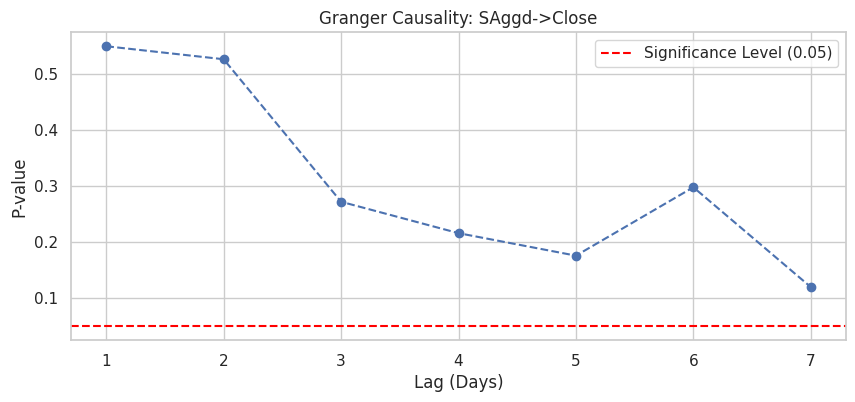

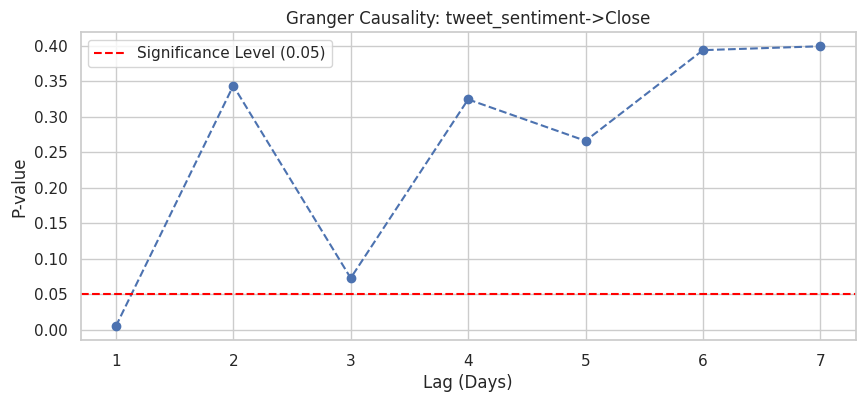

In [43]:
# Granger Causality Test (pairwise)
# ----------------------------------------------------------------
def run_granger_tests(data, variables, maxlag=10):
    """Run Granger causality tests for all variable pairs."""
    results = {}
    for cause in variables:
        for effect in variables:
            if cause == effect:
                continue
            print(f"\nTesting if {cause} Granger-causes {effect}:")
            test_data = data[[effect, cause]]  # [Y, X] format
            granger_result = grangercausalitytests(test_data, maxlag=maxlag, verbose=False)

            # Store p-values for all lags
            p_values = [round(granger_result[lag+1][0]['ssr_chi2test'][1], 4)
                       for lag in range(maxlag)]
            results[f"{cause}->{effect}"] = p_values

            # Print significant results
            significant_lags = [i+1 for i, p in enumerate(p_values) if p < 0.05]
            if significant_lags:
                print(f"Significant at lags: {significant_lags}")
            else:
                print("No significant lags")
    return results

# Variables to test
variables = ['SAggd', 'tweet_sentiment', 'Close']
results = run_granger_tests(granger_df, variables, maxlag=7)

# Visualization
# ----------------------------------------------------------------
def plot_granger_results(results, cause_effect_pair):
    """Plot p-values for a specific causality pair."""
    p_values = results[cause_effect_pair]
    lags = range(1, len(p_values)+1)

    plt.figure(figsize=(10, 4))
    plt.plot(lags, p_values, marker='o', linestyle='--')
    plt.axhline(0.05, color='red', linestyle='--', label='Significance Level (0.05)')
    plt.title(f"Granger Causality: {cause_effect_pair}")
    plt.xlabel("Lag (Days)")
    plt.ylabel("P-value")
    plt.legend()
    plt.show()

# Example: Plot SAggd_sma_smoothed -> Close
plot_granger_results(results, "SAggd->Close")

# Example: Plot tweet_sentiment_smoothed -> Close
plot_granger_results(results, "tweet_sentiment->Close")

## NASDAQ-100

In [44]:
# Select relevant columns and set date as index
# Calculate daily returns
merged_nasdaq100['Returns'] = merged_nasdaq100['Close'].pct_change().fillna(0)
granger_df2 = merged_nasdaq100[['date', 'SAggd', 'tweet_sentiment', 'SAggd_smoothed', 'tweet_sentiment_smoothed', 'Close', 'Low', 'Open', 'High', 'Returns']]
granger_df2 = granger_df2.set_index('date').sort_index()

granger_df2

,SAggd,tweet_sentiment,SAggd_smoothed,tweet_sentiment_smoothed,Close,Low,Open,High,Returns
date,,,,,,,,,
2020-01-02,0.857209,1.000000,0.857209,1.000000,8872.22,8786.90,8802.22,8873.63,0.000000
2020-01-03,-0.943012,0.733333,-0.042902,0.866667,8793.90,8755.17,8755.17,8843.65,-0.008828
2020-01-06,0.297365,1.000000,0.070521,0.911111,8848.52,8713.89,8713.89,8849.98,0.006211
2020-01-07,-0.003144,0.714286,0.052104,0.861905,8846.45,8821.68,8857.14,8872.47,-0.000234
2020-01-08,0.149545,0.517241,0.071593,0.792972,8912.37,8834.94,8845.45,8953.55,0.007452
...,...,...,...,...,...,...,...,...,...
2020-12-24,0.000003,0.729730,-0.048380,0.213115,12711.01,12665.80,12668.19,12732.55,0.004574
2020-12-28,0.031617,0.600000,-0.021465,0.247645,12838.86,12747.05,12813.97,12861.91,0.010058
2020-12-29,0.500348,0.789474,-0.007526,0.279011,12843.49,12816.59,12909.86,12925.53,0.000361


In [45]:
for col in granger_df2.columns:
    granger_df2[col] = check_stationarity(granger_df2[col], col)
granger_df2 = granger_df2.dropna()  # Drop NaN from differencing
granger_df2.info()

SAggd - ADF p-value: 0.0000
tweet_sentiment - ADF p-value: 0.0000
SAggd_smoothed - ADF p-value: 0.0824
SAggd_smoothed is non-stationary. Differencing...
tweet_sentiment_smoothed - ADF p-value: 0.0435
Close - ADF p-value: 0.9042
Close is non-stationary. Differencing...
Low - ADF p-value: 0.8994
Low is non-stationary. Differencing...
Open - ADF p-value: 0.8867
Open is non-stationary. Differencing...
High - ADF p-value: 0.9351
High is non-stationary. Differencing...
Returns - ADF p-value: 0.0001
<class 'pandas.core.frame.DataFrame'>
Index: 251 entries, 2020-01-03 to 2020-12-31
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SAggd                     251 non-null    float64
 1   tweet_sentiment           251 non-null    float64
 2   SAggd_smoothed            251 non-null    float64
 3   tweet_sentiment_smoothed  251 non-null    float64
 4   Close                     251 non-null    float64
 5

In [46]:
variables = ['SAggd', 'tweet_sentiment', 'Close']

results = run_granger_tests(granger_df2, variables, maxlag=7)



Testing if SAggd Granger-causes tweet_sentiment:
No significant lags

Testing if SAggd Granger-causes Close:
No significant lags

Testing if tweet_sentiment Granger-causes SAggd:
Significant at lags: [1, 2]

Testing if tweet_sentiment Granger-causes Close:
Significant at lags: [1]

Testing if Close Granger-causes SAggd:
No significant lags

Testing if Close Granger-causes tweet_sentiment:
Significant at lags: [1, 2, 3, 4, 5, 6, 7]


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print resul